# Post Office Problem using Brute-Force Algorithms

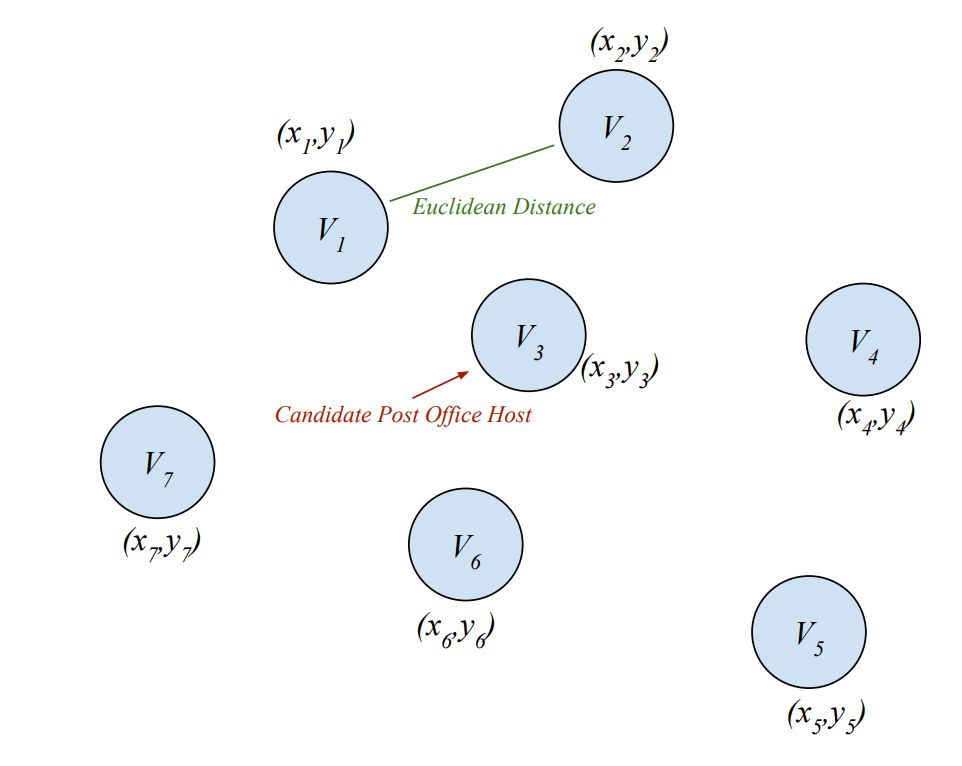


*We have $ n $ villages $ \{V_0, V_1, V_2, V_3, ..., V_{n-1} \} $ which have two dimensional coordinates denoted by integer $ x_i $ and $ y_i $. A post office needs to be built in one of these villages. All villages are well connected with almost a straight-line road.*

# Question 1:
**Using brute-force approach, design an algorithm to find the post-office location minimizing the average
distance between the villages and the post office.**

```
ALGORITHM BruteForceMinAvgDistancePostOffice(Villages)
    // Using brute-force approach, design an algorithm to find the post-office location minimizing the average distance between the villages and the post office.
    // Input: A list of Villages of n size (n≥2) where V1(x1, y1), ...
    // Output: The index of the post-office location minimizing the average distance between the villages and the post office.
    
    minAvgIndex ← 0
    minAvg ← ∞
    for i ← 0 to n-1 do
        totalDistances ← 0
        for j ← 0 to n-1 do
            totalDistances ← totalDistances + sqrt(sq(x_i - x_j) + sq(y_i - y_j))
        avg ← totalDistances / (n-1)
        if avg < minAvg
            minAvg ← avg
            minAvgIndex ← i
    return minAvgIndex
        

```

# Question 2:
**Using brute-force approach, design an algorithm to find the post-office location minimizing the
maximum distance from a village to the post office.**

```
ALGORITHM BruteForceMinMaxDistancePostOffice(Villages)
    // Using brute-force approach, design an algorithm to find the post-office location minimizing the maximum distance from a village to the post office.
    // Input: A list of Villages of n size (n≥2) where V1(x1, y1), ...
    // Output: The index of the post-office location minimizing the maximum distance from a village to the post office.
    
    minMaxDistIndex ← 0
    minMaxDist ← ∞
    for i ← 0 to n-1 do
        maxDist ← 0
        for j ← 0 to n-1 do
            maxDist ← max(maxDist, sqrt(sq(x_i - x_j) + sq(y_i - y_j)))
        if maxDist < minMaxDist
            minMaxDist ← maxDist
            minMaxDistIndex ← i
    return minMaxDistIndex
        
```

# Question 3
**Support your design by tricks to run those algorithms efficiently.**

- If we didn't use "sqrt" it will be faster.
- In the "BruteForceMinAvgDistancePostOffice" we can not to devide by the (n-1).

# Question 4
**Analyze your designed algorithms mathematically and empirically.**

## BruteForceMinAvgDistancePostOffice mathematically

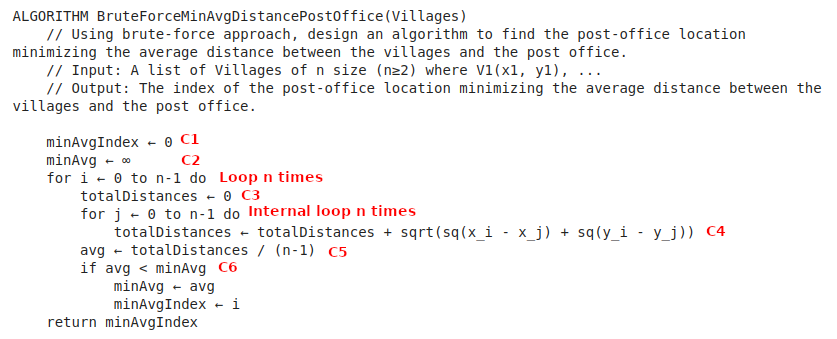

In [11]:
from IPython.display import Image
Image(filename="./BruteForceMinAvgDistancePostOffice.png")

$$ T(n) = C_1 + C_2 + \sum_{i=0}^{n-1} \left( C_3 + ( \sum_{j=0}^{n-1} C_4 ) + C_5 + C_6 \right)  $$
Let:
$$ C_1 + C_2 = C_{10} $$
And let:
$$ C_3 + C_5 + C_6 = C_{11} $$
Then:
$$ \therefore T(n) = C_{10} + \sum_{i=0}^{n-1} \left( C_{11} + ( \sum_{j=0}^{n-1} C_4 ) \right) $$
The inner loop is visiting all "n" elements once so:
$$ \therefore T(n) = C_{10} + \sum_{i=0}^{n-1} \left( C_{11} + ( n  C_4 ) \right) $$
The outer loop is visiting all "n" elements once so:
$$ \therefore T(n) = C_{10} + n \left( C_{11} + ( n  C_4 ) \right) $$
When n is very big (tends to $\infty$) then all constants could be removed: 
$$ \therefore T(n) \in O(n^2) $$

## BruteForceMinMaxDistancePostOffice mathematically

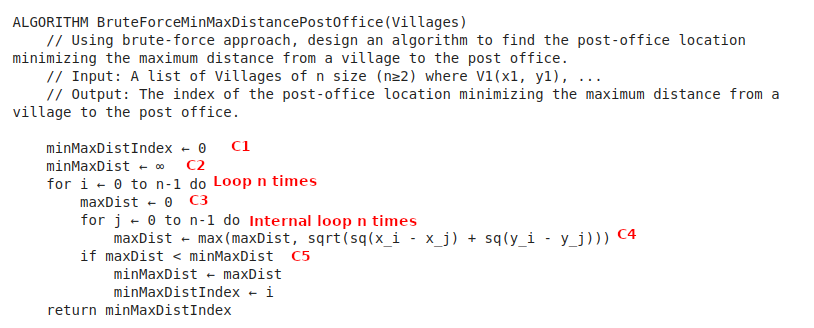

In [45]:
Image(filename="./BruteForceMinMaxDistancePostOffice.png")

$$ T(n) = C_1 + C_2 + \sum_{i=0}^{n-1} \left( C_3 + ( \sum_{j=0}^{n-1} C_4 ) + C_5 \right)  $$
Let:
$$ C_1 + C_2 = C_{10} $$
And let:
$$ C_3 + C_5 = C_{11} $$
Then:
$$ \therefore T(n) = C_{10} + \sum_{i=0}^{n-1} \left( C_{11} + ( \sum_{j=0}^{n-1} C_4 ) \right) $$
The inner loop is visiting all "n" elements once so:
$$ \therefore T(n) = C_{10} + \sum_{i=0}^{n-1} \left( C_{11} + ( n  C_4 ) \right) $$
The outer loop is visiting all "n" elements once so:
$$ \therefore T(n) = C_{10} + n \left( C_{11} + ( n  C_4 ) \right) $$
When n is very big (tends to $\infty$) then all constants could be removed: 
$$ \therefore T(n) \in O(n^2) $$

## Implementation using C++ or Python for both designs (questions 1 and 2).

In [15]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def BruteForceMinAvgDistancePostOffice(Villages):
    minAvgIndex = 0
    minAvg = sys.maxsize
    for i, v in enumerate(Villages):
        totalDistances = 0
        for j, u in enumerate(Villages):
            # totalDistances = totalDistances + np.sqrt((v[0] - u[0])**2 + (v[1] - u[1])**2)
            totalDistances = totalDistances + ((v[0] - u[0])**2 + (v[1] - u[1])**2)
        # avg = totalDistances / (len(Villages)-1)
        avg = totalDistances
        if avg < minAvg:
            minAvg = avg
            minAvgIndex = i
    return minAvgIndex

In [17]:
def BruteForceMinMaxDistancePostOffice(Villages):
    minMaxDistIndex = 0
    minMaxDist = sys.maxsize
    for i, v in enumerate(Villages):
        maxDist = 0
        for j, u in enumerate(Villages):
            # maxDist = np.max(maxDist, np.sqrt((v[0] - u[0])**2 + (v[1] - u[1])**2))
            maxDist = max(maxDist, (v[0] - u[0])**2 + (v[1] - u[1])**2)
        if maxDist < minMaxDist:
            minMaxDist = maxDist
            minMaxDistIndex = i
    return minMaxDistIndex

## Plot a sample with 100 points

In [18]:
villages = np.random.randn(100, 2)

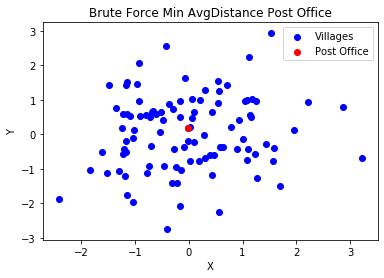

In [55]:
minAvgIndex = BruteForceMinAvgDistancePostOffice(villages)
postOfficeLocation = villages[minAvgIndex]
plt.scatter(villages[:, 0], villages[:, 1], color='blue')
plt.scatter(postOfficeLocation[0], postOfficeLocation[1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Brute Force Min AvgDistance Post Office')
plt.legend(['Villages', 'Post Office'])

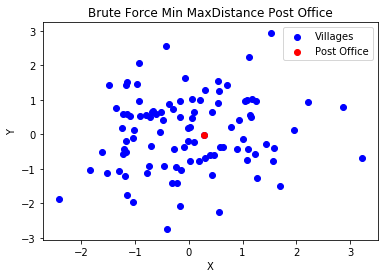

In [54]:
minMaxDistIndex = BruteForceMinMaxDistancePostOffice(villages)
postOfficeLocation = villages[minMaxDistIndex]
plt.scatter(villages[:, 0], villages[:, 1], color='blue')
plt.scatter(postOfficeLocation[0], postOfficeLocation[1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Brute Force Min MaxDistance Post Office')
plt.legend(['Villages', 'Post Office'])

## Chart (using excel for C++ users to make their life easy) showing the order of growth function as well as scatter points from the empirical analysis (your code running at different n).

In [47]:
import time

In [48]:
BruteForceMinAvgDistanceResults = np.zeros((101, 2))
BruteForceMinMaxDistanceResults = np.zeros((101, 2))
for index, i in enumerate(range(2, 1000, 10)):
    newVillages = np.random.randn(i, 2)
    
    # Brute Force Min AvgDistance Post Office
    start = time.time()
    BruteForceMinAvgDistancePostOffice(newVillages)
    end = time.time()
    BruteForceMinAvgDistanceResults[index][0] = i
    BruteForceMinAvgDistanceResults[index][1] = end - start
    
    # Brute Force Min MaxDistance Post Office
    start = time.time()
    BruteForceMinMaxDistancePostOffice(newVillages)
    end = time.time()
    BruteForceMinMaxDistanceResults[index][0] = i
    BruteForceMinMaxDistanceResults[index][1] = end - start

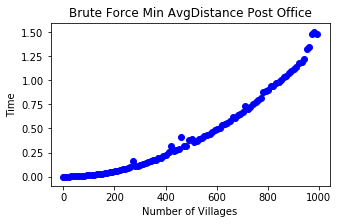

In [51]:
plt.scatter(BruteForceMinAvgDistanceResults[:, 0], BruteForceMinAvgDistanceResults[:, 1], color='blue')
plt.xlabel('Number of Villages')
plt.ylabel('Time')
plt.title('Brute Force Min AvgDistance Post Office')

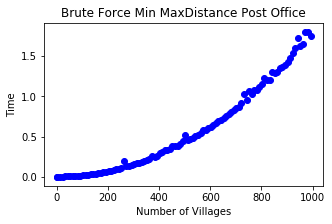

In [52]:
plt.scatter(BruteForceMinMaxDistanceResults[:, 0], BruteForceMinMaxDistanceResults[:, 1], color='blue')
plt.xlabel('Number of Villages')
plt.ylabel('Time')
plt.title('Brute Force Min MaxDistance Post Office')

# Question 5
**Which minimization is more suitable for this application, average or maximum distance and why? And
which is faster to execute?**

The Avarage distance is more suitable for this application. But the Maximum is faster as there is no need to calculate the total distances and get the avarage for each village and the others. Both are $O(n^2)$ but the difference is a performance difference.